# Linear Model

In [59]:
import mglearn 


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


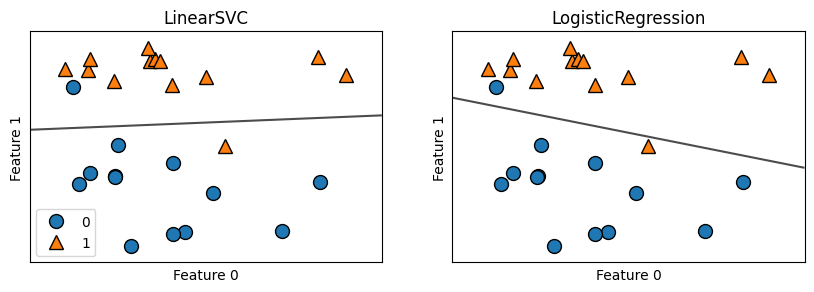

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize = (10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps =0.5,ax = ax ,alpha = .7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()


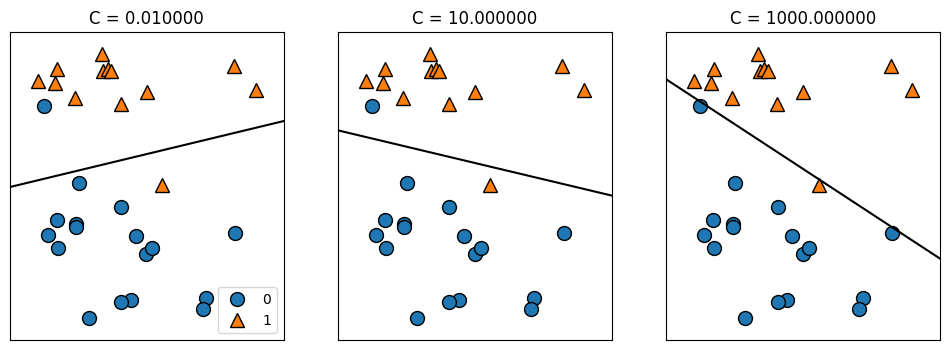

In [61]:
mglearn.plots.plot_linear_svc_regularization()

# Analyzing logistic regression on breast cancer dataset


In [62]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression(solver='liblinear').fit(X_train,y_train)
print("Training set score : {:.2f}".format(logreg.score(X_train,y_train)))
print("Test set score : {:.2f}".format(logreg.score(X_test,y_test)))


Training set score : 0.95
Test set score : 0.96


In [63]:
logreg100 = LogisticRegression(C=100,solver='liblinear').fit(X_train,y_train)
print("Training set score : {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score : {:.3f}".format(logreg.score(X_test,y_test)))

Training set score : 0.953
Test set score : 0.958


In [64]:
logreg001 = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
print("Training set score : {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score : {:.3f}".format(logreg.score(X_test,y_test)))

Training set score : 0.953
Test set score : 0.958


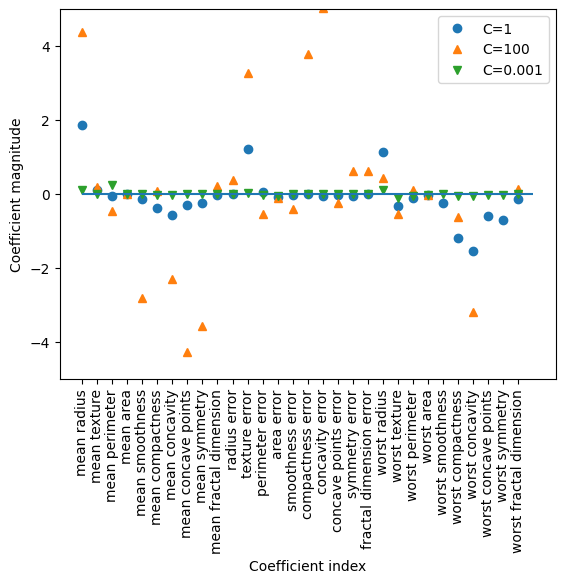

In [65]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C= 0.001
Test accuracy of l1 logreg with C= 0.001
Training accuracy of l1 logreg with C= 1.000
Test accuracy of l1 logreg with C= 1.000
Training accuracy of l1 logreg with C= 100.000
Test accuracy of l1 logreg with C= 100.000


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


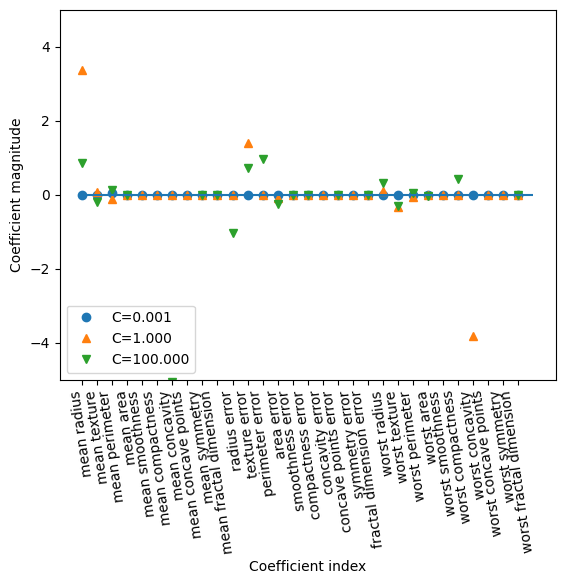

In [66]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C,penalty="l1",solver = 'liblinear').fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C= {:.3f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logreg with C= {:.3f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label = "C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,rotation = 98)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5,5)
plt.legend(loc=3)
    

# Linear Model for Multiclass classification


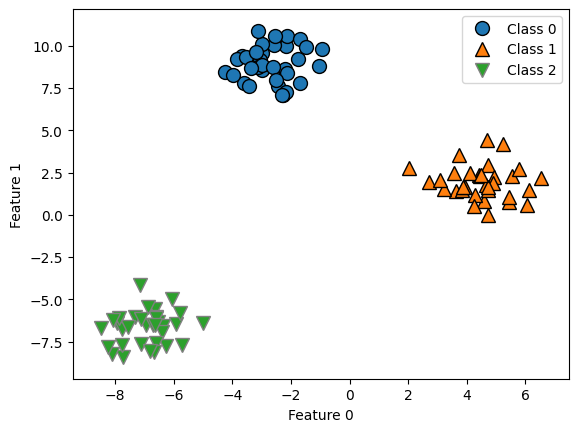

In [67]:
from sklearn.datasets import make_blobs 

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(["Class 0","Class 1","Class 2"])

In [68]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape :",linear_svm.coef_.shape)
print("Intercept shape :",linear_svm.intercept_.shape)

Coefficient shape : (3, 2)
Intercept shape : (3,)


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


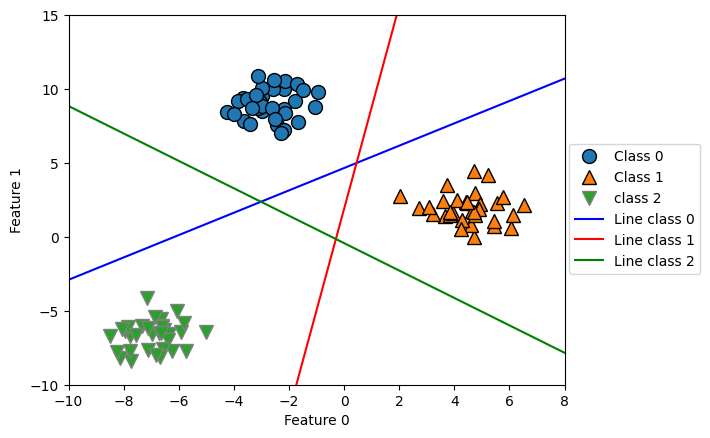

In [69]:
import numpy as np


mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0] + intercept)/ coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))

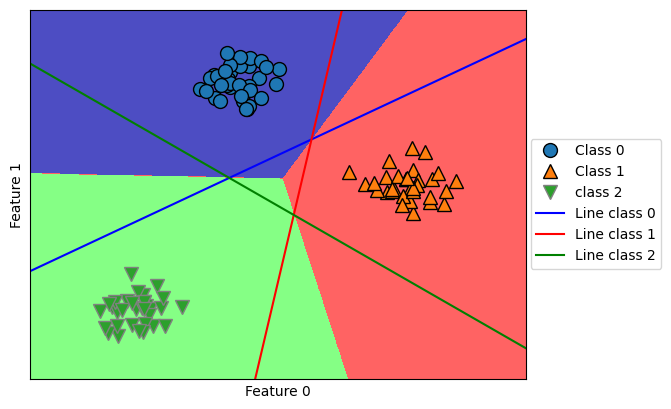

In [70]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef ,intercept ,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line * coef[0] + intercept)/coef[1], c= color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))
    

# Naive bayes classifier


In [71]:
X = np.array([[0,1,0,1],
              [1, 0, 1, 1],
               [0, 0, 0, 1],
              [1, 0, 1, 0]
             ])

y = np.array([0,1,0,1])

In [72]:
np.unique(y)

array([0, 1])

In [73]:
for lab in np.unique(y):
    print(y==lab)

[ True False  True False]
[False  True False  True]


# Decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state =0)
tree.fit(X_train,y_train)
print("Accuracy on training set : {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on test set : 0.937


In [75]:
tree = DecisionTreeClassifier(max_depth = 4,random_state = 0)
tree.fit(X_train,y_train)

print("Accuracy on training set : {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set : 0.988
Accuracy on test set : 0.951


In [76]:
print("Feature importance :\n{}".format(tree.feature_importances_))

Feature importance :
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


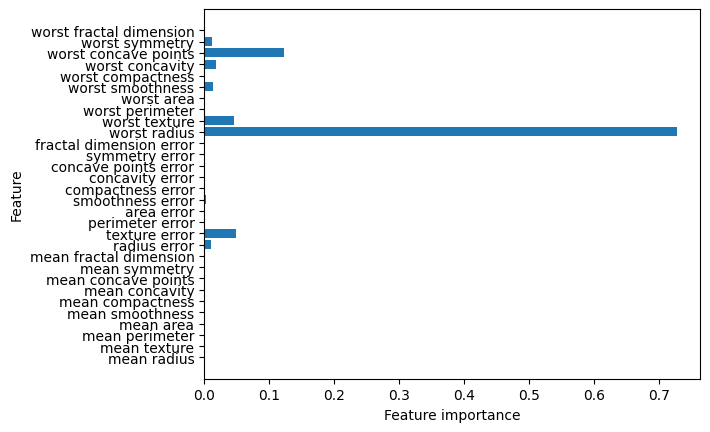

In [77]:
def plot_feature_importances_cancer(model):
    n_features= cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)
    

# Ensemble Decision Tree

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples = 100,noise = 0.25,random_state = 3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,random_state = 42)

forest = RandomForestClassifier(n_estimators=5,random_state = 2)
forest.fit(X_train,y_train)


RandomForestClassifier(n_estimators=5, random_state=2)

### Visualizing the data learned by each tree

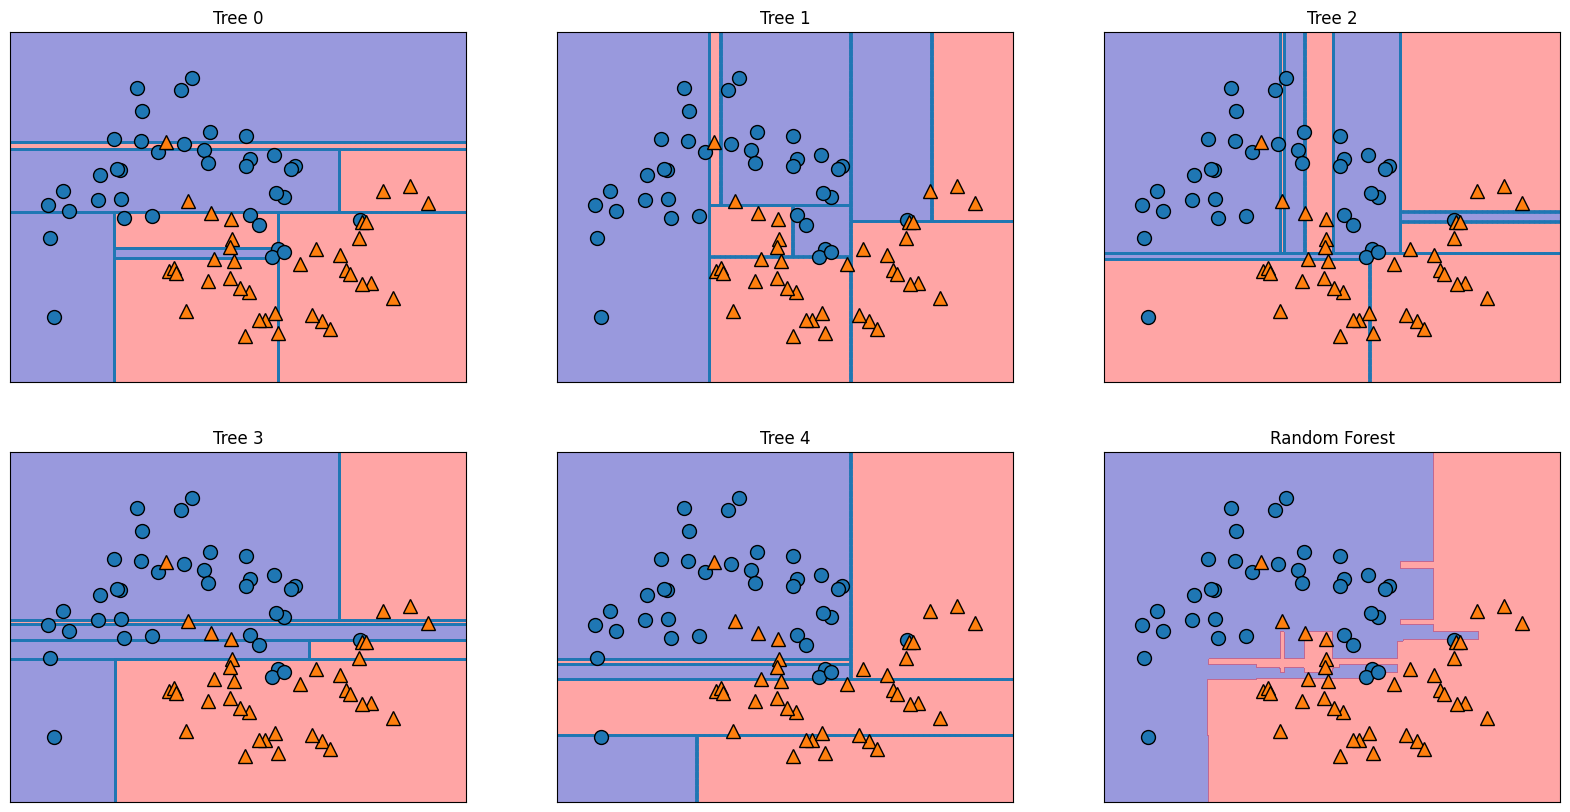

In [79]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3,figsize = (20,10))

for i ,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train,fill=True,ax = axes[-1,-1],alpha = .4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

### eg : applying random forest consisting 100 of trees on the breast cancer dataset 

In [80]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state =0)
forest =  RandomForestClassifier(n_estimators = 100,random_state=0)

forest.fit(X_train,y_train)

print("Accuracy on trainig set : {:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on testing set : {:.3f}".format(forest.score(X_test,y_test)))

Accuracy on trainig set : 1.000
Accuracy on testing set : 0.972


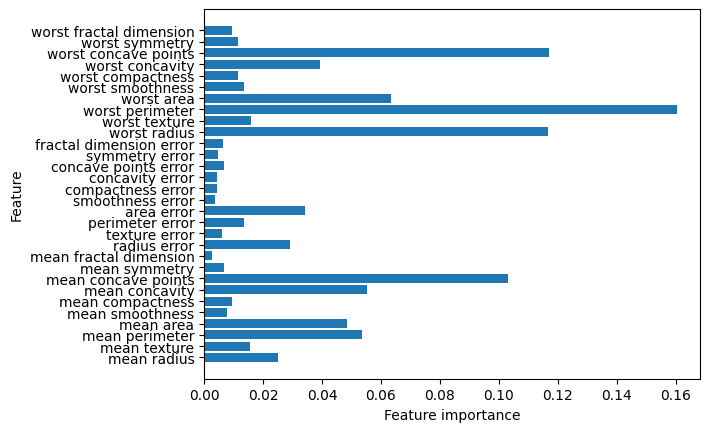

In [81]:
plot_feature_importances_cancer(forest)

# Gradient boosted regression trees

In [82]:
from sklearn.ensemble import GradientBoostingClassifier 
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state = 0)

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train,y_train)

print("Accuracy on training set : {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on testing set : {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on testing set : 0.965


In [83]:
gbrt = GradientBoostingClassifier(random_state = 0,max_depth = 1)
gbrt.fit(X_train,y_train)

print("Accuracy on training set : {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on testing set : {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set : 0.991
Accuracy on testing set : 0.972


In [84]:
gbrt = GradientBoostingClassifier(random_state = 0,learning_rate = 0.01)
gbrt.fit(X_train,y_train)

print("Accuracy on training set : {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on testing set : {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set : 0.988
Accuracy on testing set : 0.965


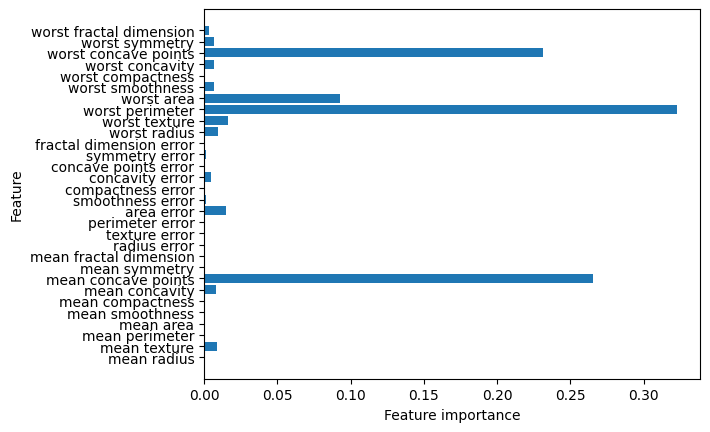

In [85]:
gbrt = GradientBoostingClassifier(random_state = 0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

#  support vector machine

Text(0, 0.5, 'Feature 1')

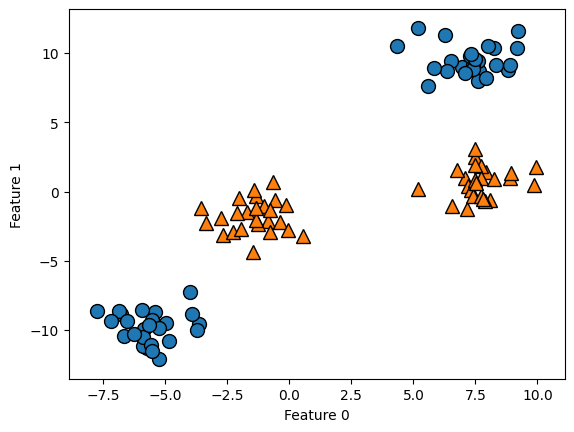

In [86]:
X,y = make_blobs(centers = 4,random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

from sklearn.svm import LinearSVC
linear_svm = LinearSVC.fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discret_scatter(X[:,0],X[:,1],y)


# deep learning

Text(0, 0.5, 'relu(x), tanh(x)')

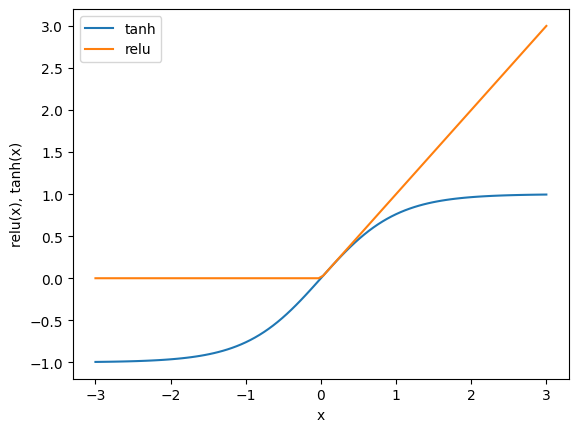

In [87]:
import numpy as np

line = np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label = 'tanh')
plt.plot(line,np.maximum(line,0),label = 'relu')
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

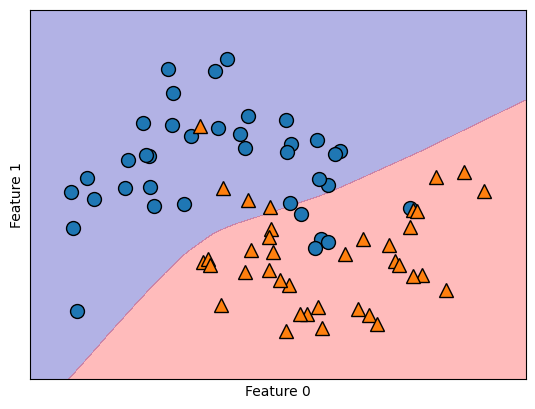

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise = 0.25, random_state = 3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify =y,random_state = 42)

mlp = MLPClassifier(random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill= True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

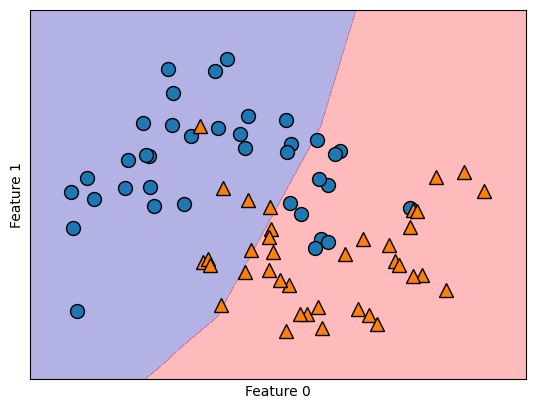

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise = 0.25, random_state = 3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify =y,random_state = 42)

mlp = MLPClassifier(random_state=0,hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill= True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

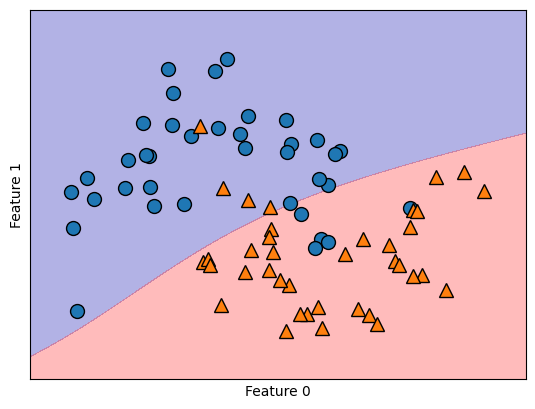

In [90]:

mlp = MLPClassifier(random_state=0,hidden_layer_sizes=[10,10],activation='tanh')
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill= True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

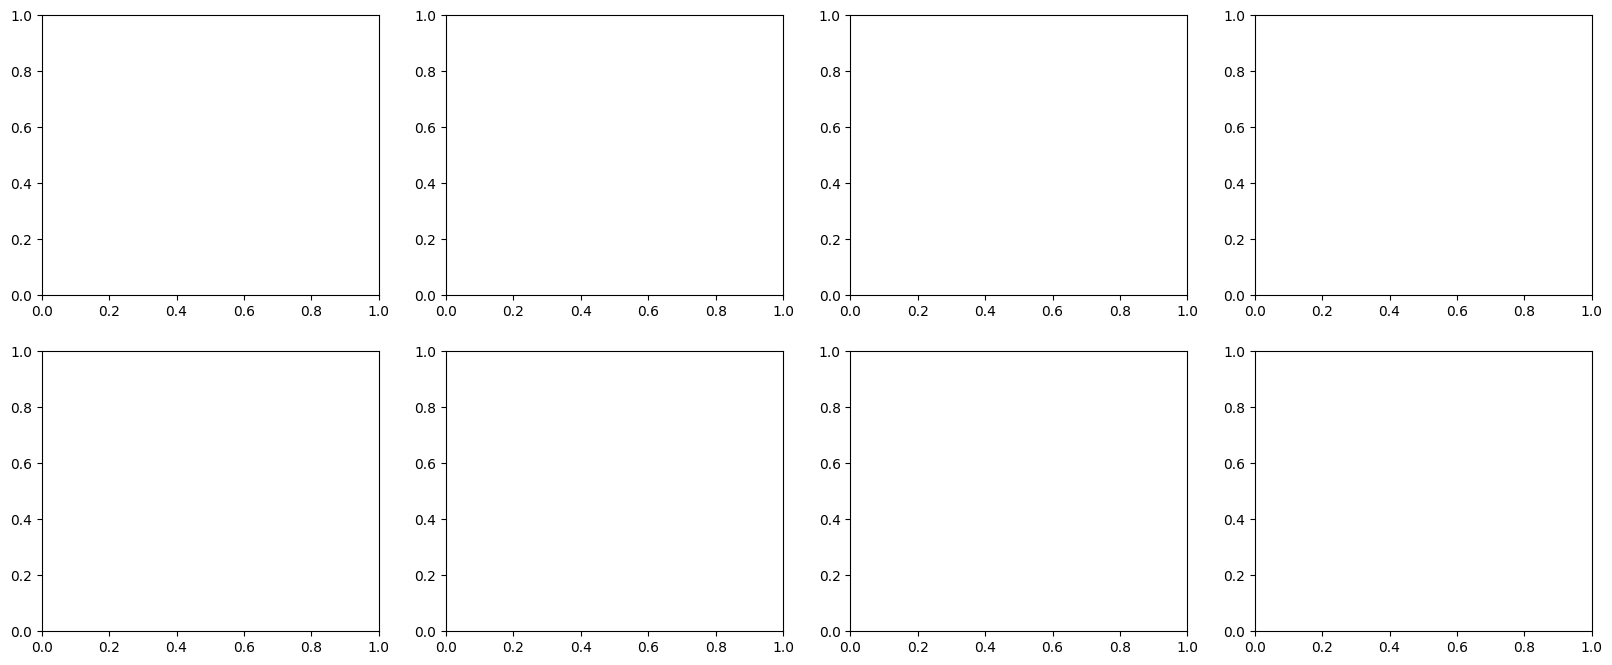

In [91]:
fig, axes = plt.subplots(2,4,figsize = (20,8))
for axx ,n_hidden_nodes in zip(axes,[10,100]):
    for zx , alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha = alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, ax =ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))

# Neural Network on real-world-data

In [92]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [93]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("Accuracy on training set : {:.2f}".format(mlp.score(X_train,y_train)))
print("Accuracy on testing set : {:.2f}".format(mlp.score(X_test,y_test)))

Accuracy on training set : 0.94
Accuracy on testing set : 0.92


In [94]:
# compute the men value per feature on hte training set
mean_on_train = X_train.mean(axis=0)
# compute hte standard deviation of each feature on the trainin set
std_on_train = X_train.std(axis = 0)

#subtract the mean,and scale by inverse standard deviation
#afterward , mean = 0 , std =1 
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use the same transformation (using training mean and std ) on the test set 
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set : {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on testing set : {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set : 0.991
Accuracy on testing set : 0.965


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [96]:
mlp = MLPClassifier(max_iter = 1000,random_state = 0)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on testing set : {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 1.000
Accuracy on test set : 0.972


In [98]:
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on testing set : {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 0.988
Accuracy on testing set : 0.972


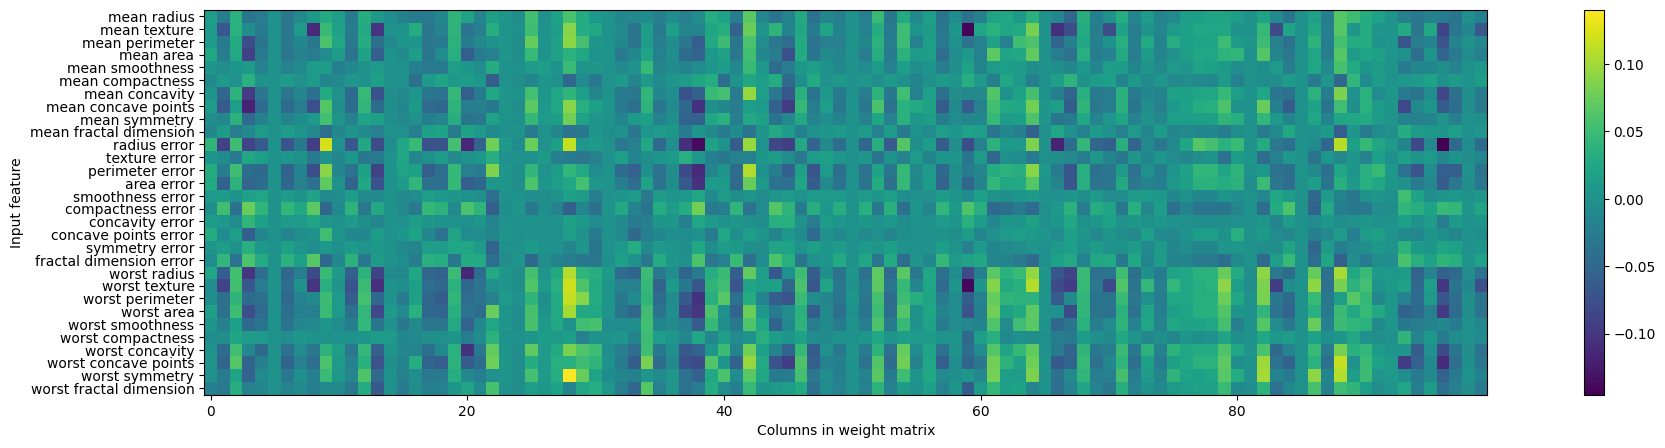

In [103]:
plt.figure(figsize =(25,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap = 'viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()